In [ ]:
#import required libraries:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import seaborn as sns

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file and extraction directory
uploaded_file_path = '/content/Augmented.zip'
extraction_path = '/content/Augmenteds'

# Extract the contents of the zip file
with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the contents of the extracted directory to verify
extracted_files = os.listdir(extraction_path)
extracted_files


['Augmented']

In [ ]:
# Define the dataset path and folder structure
dataset_path = "/content/Augmented.zip"
cases = ["Bengin cases","Malignant cases","Normal cases"]

In [ ]:
# create a dataframe to store image features:
columns = ["Case", "File Name", "Width", "Height", "Aspect Ratio", "File Size (KB)"]
image_data = []

In [ ]:
#Loop for each case folder
for case in cases:
    case_path = os.path.join(dataset_path, case)
    if not os.path.exists(case_path):
        print(f"Folder '{case}' not found.")
        continue

    # Loop for each image in the folder:
    for file_name in os.listdir(case_path):
        file_path = os.path.join(case_path, file_name)
        try:
            # Open the image
            with Image.open(file_path) as img:
                width, height = img.size
                aspect_ratio = round(width / height, 2)
                file_size_kb = os.path.getsize(file_path) / 1024

                # Append metadata
                image_data.append([case, file_name, width, height, aspect_ratio, file_size_kb])
        except Exception as e:
            print(f"Error reading file {file_name} in {case}: {e}")

In [ ]:
# providing metadata to DataFrame
df = pd.DataFrame(image_data, columns=columns)

In [ ]:
df

,Case,File Name,Width,Height,Aspect Ratio,File Size (KB)
0,Bengin cases,Bengin case (75)_brightness_0.8.jpg,512,512,1.0,30.302734
1,Bengin cases,Bengin case (40)_brightness_1.2.jpg,512,512,1.0,32.950195
2,Bengin cases,Bengin case (27)_brightness_0.8.jpg,512,512,1.0,32.141602
3,Bengin cases,Bengin case (38)_horizontal.jpg,512,512,1.0,33.336914
4,Bengin cases,Bengin case (51)_rotated_-15.jpg,628,628,1.0,40.225586
...,...,...,...,...,...,...
6577,Normal cases,Normal case (58)_brightness_1.2.jpg,512,512,1.0,36.712891
6578,Normal cases,Normal case (373)_rotated_-15.jpg,628,628,1.0,42.339844
6579,Normal cases,Normal case (26)_brightness_1.2.jpg,512,512,1.0,26.462891
6580,Normal cases,Normal case (273)_rotated_15.jpg,628,628,1.0,49.339844


In [ ]:
import os
import pandas as pd
from PIL import Image

# Define the correct dataset path
dataset_path = "/content/Augmenteds/Augmented"
cases = ["Bengin cases", "Malignant cases", "Normal cases"]

# Create a DataFrame to store image metadata
columns = ["Case", "File Name", "Width", "Height", "Aspect Ratio", "File Size (KB)"]
image_data = []

# Supported image file extensions
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

# Loop through each case folder
for case in cases:
    case_path = os.path.join(dataset_path, case)
    if not os.path.exists(case_path):
        print(f"Folder '{case}' not found.")
        continue

    # Loop through each file in the folder
    for file_name in os.listdir(case_path):
        file_path = os.path.join(case_path, file_name)

        # Skip non-image files
        if not any(file_name.lower().endswith(ext) for ext in valid_extensions):
            print(f"Skipping non-image file {file_name} in {case}.")
            continue

        try:
            # Open and process the image
            with Image.open(file_path) as img:
                img.verify()  # Verify that it is a valid image
                width, height = img.size
                aspect_ratio = round(width / height, 2)
                file_size_kb = os.path.getsize(file_path) / 1024

                # Append metadata
                image_data.append([case, file_name, width, height, aspect_ratio, file_size_kb])
        except (IOError, SyntaxError) as e:
            print(f"Skipping corrupted file {file_name} in {case}: {e}")

# Convert the collected data into a DataFrame
df = pd.DataFrame(image_data, columns=columns)

# Save the metadata to a CSV file
output_csv = os.path.join(dataset_path, "processed_image_data.csv")
df.to_csv(output_csv, index=False)
print(f"The data has been successfully saved to {output_csv}")

# Display the first few rows of the DataFrame
print(df.head())


Skipping non-image file image_data.csv in Bengin cases.
Skipping non-image file image_data.csv in Normal cases.
The data has been successfully saved to /content/Augmented/Augmented/processed_image_data.csv
           Case                                          File Name  Width  \
0  Bengin cases  Bengin case (10)_brightness_1_vertical_horizon...    512   
1  Bengin cases  Bengin case (115)_brightness_1_horizontal_hori...    628   
2  Bengin cases  Bengin case (90)_rotated_15_horizontal_horizon...    770   
3  Bengin cases  Bengin case (16)_rotated_15_vertical_vertical_...    770   
4  Bengin cases  Bengin case (108)_brightness_0_horizontal_vert...    628   

   Height  Aspect Ratio  File Size (KB)  
0     512           1.0       35.649414  
1     628           1.0       44.934570  
2     770           1.0       46.720703  
3     770           1.0       41.482422  
4     628           1.0       93.118164  


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np

# Path to augmented images
augmented_folder = ""

# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2  # Split into 80% training and 20% validation
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    augmented_folder,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',  # For multi-class classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    augmented_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Compute Class Weights to handle imbalance
class_labels = train_generator.classes  # Extract class labels from the generator
classes = np.unique(class_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=class_labels)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weight_dict)


Found 5266 images belonging to 3 classes.
Found 1316 images belonging to 3 classes.
Class Weights: {0: 3.0474537037037037, 1: 0.651813343235549, 2: 0.8789851443832415}


In [ ]:
# Define CNN Model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    class_weight=class_weight_dict,  # Handle class imbalance
    verbose=1
)

# Evaluate the Model
eval_results = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_results[0]}")
print(f"Validation Accuracy: {eval_results[1]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.4676 - loss: 1.0682 - val_accuracy: 0.5030 - val_loss: 1.2516
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7453 - loss: 0.6696 - val_accuracy: 0.6018 - val_loss: 1.2542
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.8622 - loss: 0.4044 - val_accuracy: 0.5578 - val_loss: 1.7318
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9163 - loss: 0.2425 - val_accuracy: 0.5904 - val_loss: 1.7787
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9598 - loss: 0.1273 - val_accuracy: 0.5980 - val_loss: 2.1922
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.9721 - loss: 0.0855 - val_accuracy: 0.6345 - val_loss: 2.4263
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9762 - loss: 0.0826 - val_accuracy: 0.6489 - val_loss: 2.5587
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9726 - loss: 0.0797 - val_accuracy: 0.659

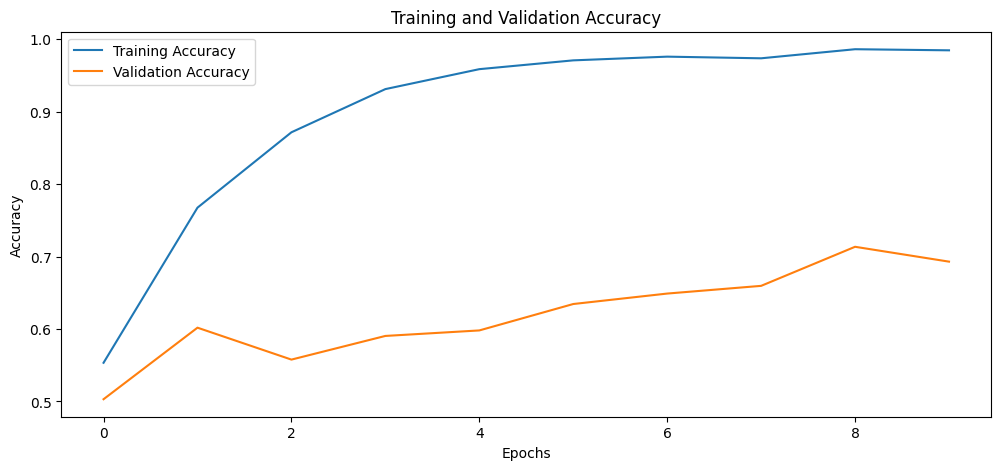

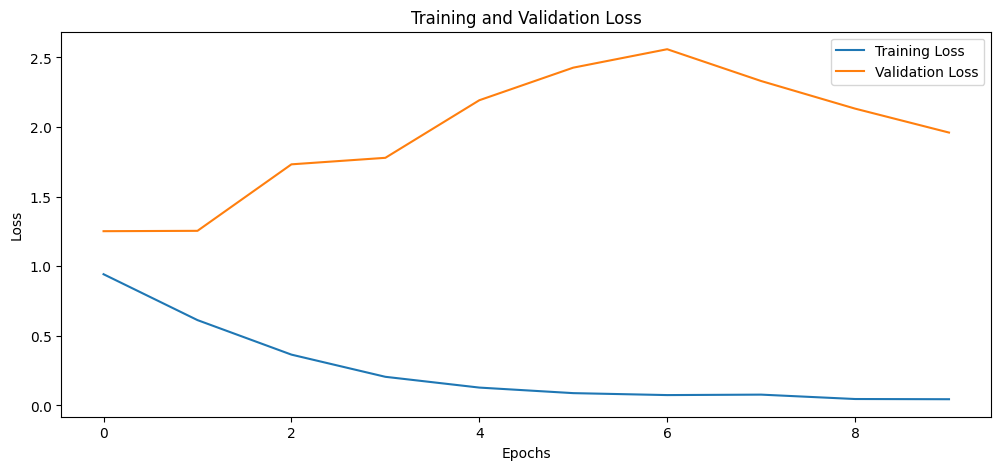

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
